<a href="https://colab.research.google.com/github/123mayor-ui/-/blob/main/17nov_m7_t6_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Оптимизация гиперпараметров модели
##

 *Гиперпараметры* — это параметры, которые настраиваются до начала процесса обучения и определяют структуру модели и способ её обучения.  Число гиперпараметров  может быть достаточно большим, а оптимальные значения гиперпараметров для одного и того же алгоритма могут
различаться в зависимости от задачи, решаемой алгоритмом, и входных данных,
с которыми он должен работать. Обычно, оптимальные значения гиперпараметров не
являются очевидными, и их необходимо подбирать. *Процесс подбора* может занимать
большое количество времени

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


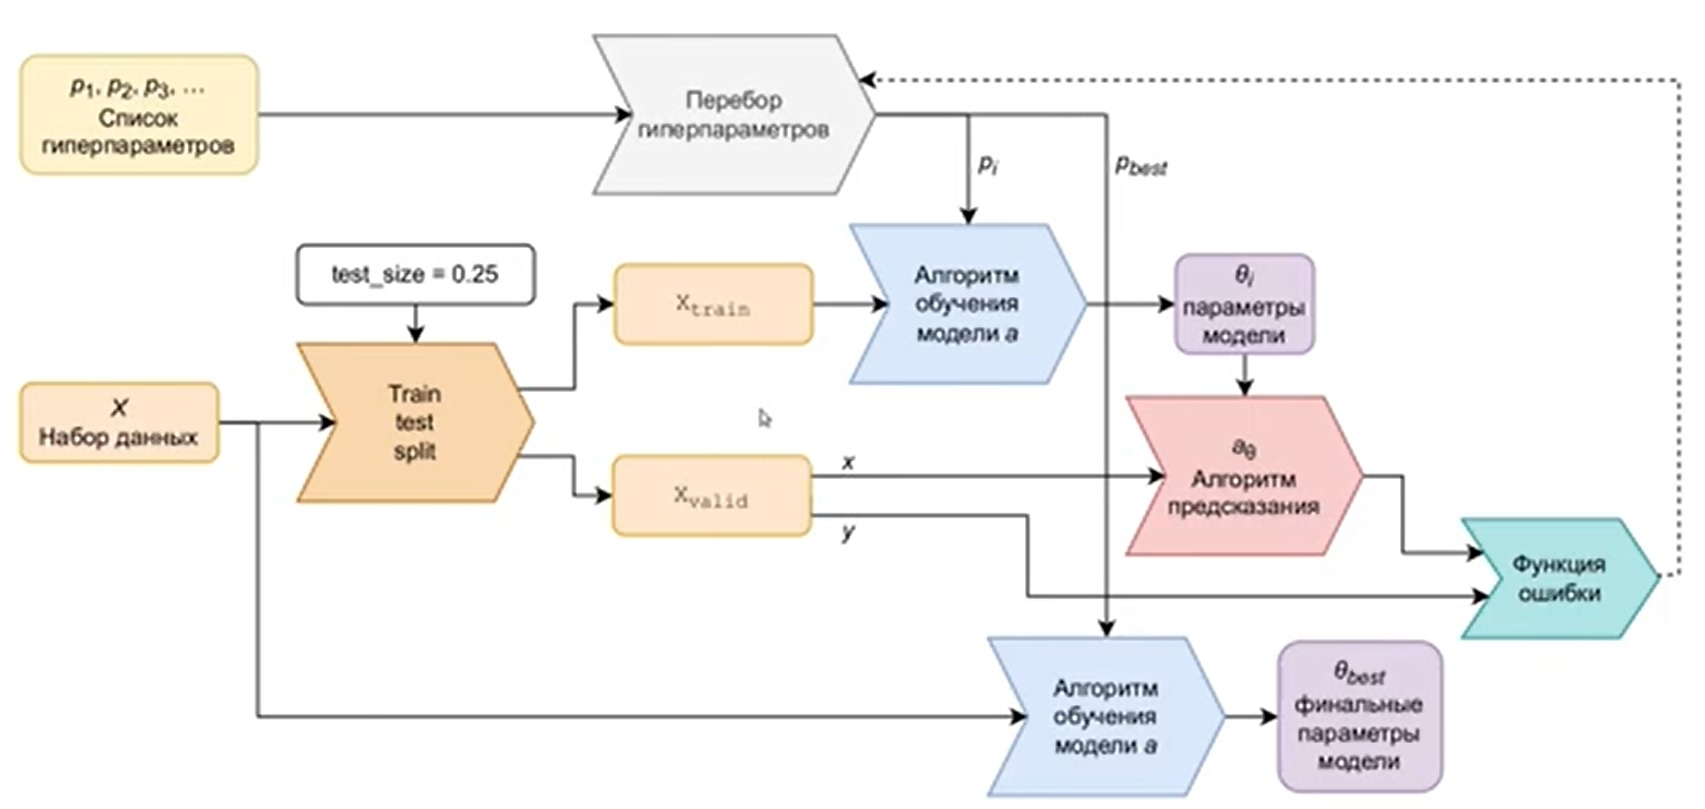

In [ ]:
import pandas as pd

#импорт датасета
h = pd.read_csv('/content/drive/MyDrive/Статистический анализ данных/heart3.csv')#, header=None)
feature_names=h.columns.tolist()
print(h.head(3))
print(feature_names)

   Бронхиальная астма  Возраст алког  Работа  Переломы  Время пробуждения  \
0                   0           18.0       1         0                  6   
1                   0           90.0       0         1                  4   
2                   0           17.0       0         0                  7   

   ЛПВП  Выход на пенсию  Холестерин  Артериальная гипертония  Триглицериды  \
0  0.97                0         4.0                        0          0.52   
1  0.74                0         8.6                        0          2.73   
2  1.57                0         5.2                        0          1.02   

   ...  Время засыпания  Хроническое заболевание легких  Сигарет в день  \
0  ...               10                               0            20.0   
1  ...               12                               0             0.0   
2  ...               11                               0             0.0   

   Образование  Индекс массы тела, кг/м^2  Прекращение работы по болезни 

In [ ]:
feature_names=['Bronchial asthma','Age of alcohol','Work','Fractures','Time of awakening','HDL','Retirement','Cholesterol',
'Arterial hypertension','Triglycerides','Hepatitis','Diabetes','Gender','Sports, clubs','Family',
'Frequency of pass','Age of smoking', 'Oncology','Injuries per year','Regular intake of medications','Nationality',
'Alcohol','Fasting plasma glucose','Abdominal obesity, cm','Afternoon sleep','Time to fall asleep','Chronic lung disease',
'Cigarettes per day','Education','Body mass index, kg/m^2','Work leave due to illness','Religion','Occupation','Duration of sleep']
target_names=['Cardiovascular disease']

In [ ]:
data = h.iloc[:, :-2]    # Все строки, все столбцы до предпоследнего
last_col = h.iloc[:, -1:]
X = pd.concat([data, last_col], axis=1).values   # Добавляем последний столбец
y=h.iloc[:, -2].values
print(X.shape)
print(y.shape)
print(feature_names)

(949, 34)
(949,)
['Bronchial asthma', 'Age of alcohol', 'Work', 'Fractures', 'Time of awakening', 'HDL', 'Retirement', 'Cholesterol', 'Arterial hypertension', 'Triglycerides', 'Hepatitis', 'Diabetes', 'Gender', 'Sports, clubs', 'Family', 'Frequency of pass', 'Age of smoking', 'Oncology', 'Injuries per year', 'Regular intake of medications', 'Nationality', 'Alcohol', 'Fasting plasma glucose', 'Abdominal obesity, cm', 'Afternoon sleep', 'Time to fall asleep', 'Chronic lung disease', 'Cigarettes per day', 'Education', 'Body mass index, kg/m^2', 'Work leave due to illness', 'Religion', 'Occupation', 'Duration of sleep']


In [ ]:
#разделение набора данных на обучающие и тествые (70 к 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#Анализ регуляризованных линейных моделей

Продемонстрируем разные подходы к моделированию и оценим их производительность на реальных данных
### Модель линейной регрессии со всеми переменными

In [ ]:
#1 Служит базовой (baseline) моделью для сравнения. Показывает, как работает простая, интерпретируемая модель без оптимизации.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# инициируем линейную модель и подгоним ее под данные
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("R-2 значение: {0:0.4f} \n".format(lm.score(X_train, y_train)))

R-2 значение: 0.8949 



In [ ]:
p=lm.predict(X_test)

In [ ]:
param_df = pd.DataFrame({"Признаки": ['intercept']+ list(feature_names),"Коэффициенты": [lm.intercept_] +list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

    Коэффициенты                       Признаки
0  -1.964695e+00                      intercept
1  -8.050766e-05               Bronchial asthma
2  -2.643517e-04                 Age of alcohol
3  -1.437622e-02                           Work
4  -7.180677e-03                      Fractures
5  -1.586921e-03              Time of awakening
6   3.013831e-01                            HDL
7   3.096725e-03                     Retirement
8   5.613917e-02                    Cholesterol
9   3.984393e-01          Arterial hypertension
10  6.182571e-02                  Triglycerides
11 -2.241880e-02                      Hepatitis
12  8.851407e-02                       Diabetes
13  1.428810e-01                         Gender
14 -5.461801e-02                  Sports, clubs
15 -8.513561e-07                         Family
16 -4.840327e-03              Frequency of pass
17 -2.185870e-04                 Age of smoking
18 -4.433945e-03                       Oncology
19 -2.026979e-02              Injuries p

In [ ]:
#%% проверка производительности на тестовых данных
predicted = lm.predict(X_test)

In [ ]:
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(lm.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8763
Средняя абсолютная ошибка: 0.125465
Корневая средняя квадратичная ошибка: 0.173867
Относительная абсолютная ошибка: 0.256775
Относительная квадратичная ошибка: 0.123736


###Линейная регрессия после отбора признаков (RFE)

In [ ]:
#2 Проверяется гипотеза, что удаление неинформативных или избыточных признаков улучшает обобщающую способность модели (уменьшает переобучение и повышает устойчивость)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold,StratifiedKFold #для K-кратной перекрестной проверки
from sklearn.ensemble import RandomForestClassifier #случайный лес


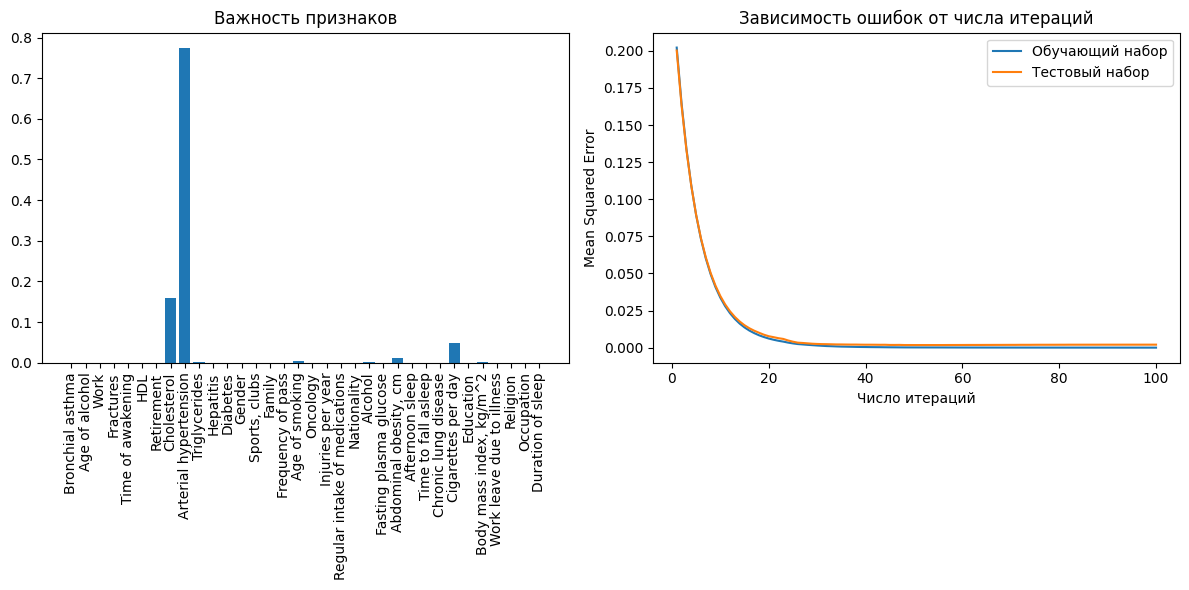

In [ ]:
# в едином фрагменте рассмотрим этапы разделение-> обучение-> выбор важных признаков -> предсказание на новых данных
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Создание и обучение градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)

# Важность признаков
feature_importance = gb_model.feature_importances_

# Величина ошибок на обучающем и тестовом наборах
train_errors = []
test_errors = []

for n_estimators in range(1, 101):
    gb_model.set_params(n_estimators=n_estimators)
    gb_model.fit(X_train, y_train)

    # Предсказание на обучающем и тестовом наборах
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)

    # Расчет ошибок
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Построение графиков
plt.figure(figsize=(12, 6))

# График важности признаков
plt.subplot(1, 2, 1)
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.title('Важность признаков')

# График зависимости величины ошибок от числа итераций
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), train_errors, label='Обучающий набор')
plt.plot(range(1, 101), test_errors, label='Тестовый набор')
plt.xlabel('Число итераций')
plt.ylabel('Mean Squared Error')
plt.title('Зависимость ошибок от числа итераций')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# инициировать линейную модель
lm = LinearRegression()

In [ ]:
min_mascaler =  preprocessing.MinMaxScaler()
scaled_minmax= min_mascaler.fit_transform(X_train)
scaled_minmadf = pd.DataFrame(scaled_minmax, columns = feature_names)

In [ ]:
#рекурсивное исключение признаков с перекрестной валидацией, используя r-квадрат в качестве метрики
rfecv = RFECV(estimator=lm, step=1, cv=5)
rfecv.fit(scaled_minmadf, y_train)

RFECV(cv=5, estimator=LinearRegression())

In [ ]:
# выведем оптимальное количество функций
print("Оптимальное количество признаков : %d" % rfecv.n_features_)

Оптимальное количество признаков : 17


In [ ]:
# %% fit model с выбранными функциями
#%% fit model с выбранными функциями  X_train_new = X_train[:,rfecv.support_]
X_train_new = X_train[:,rfecv.support_]
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
predicted = lm2.predict(X_train_new)

rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Среднеквадратическое отклонение ошибки: {0:0.4f}" .format(rmse))

Среднеквадратическое отклонение ошибки: 0.1628


In [ ]:
# выведем R-квадрат
print("R-квадрат занчение: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

R-квадрат занчение: 0.8934 



In [ ]:
feature_cols_selected = list(np.array(feature_names)[rfecv.support_])
# выведем перехват и коэффициенты
param_df = pd.DataFrame({"Характеристики": ['intercept'] + feature_cols_selected ,
"Коэффициент": [lm2.intercept_] + list(lm2.coef_)})

cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

    Коэффициент                 Характеристики
0     -1.895744                      intercept
1      0.262141                            HDL
2      0.056138                    Cholesterol
3      0.402786          Arterial hypertension
4      0.056081                  Triglycerides
5      0.076109                       Diabetes
6      0.154537                         Gender
7     -0.048406                  Sports, clubs
8      0.046260  Regular intake of medications
9      0.005730         Fasting plasma glucose
10     0.012435          Abdominal obesity, cm
11    -0.009553            Time to fall asleep
12     0.011247             Cigarettes per day
13    -0.021417                      Education
14     0.014803        Body mass index, kg/m^2
15    -0.048201      Work leave due to illness
16     0.000140                     Occupation
17     0.006232              Duration of sleep


In [ ]:
# %% проверить производительность по тестовым данным
X_test_part = X_test[:,rfecv.support_]
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
# выведем показатели на тестовых данных
print("Значение R-квадрат равно: {0:0.4f}".format(lm2.score(X_train_new, y_train)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8934
Средняя абсолютная ошибка: 0.123977
Корневая средняя квадратичная ошибка: 0.173080
Относительная абсолютная ошибка: 0.253730
Относительная квадратичная ошибка: 0.122617


##Гребневая регрессия и классификация

Это регуляризованная версия линейной регрессии, которая добавляет L2-штраф к сумме квадратов коэффициентов с целью  уменьшения переобучения, особенно когда признаки сильно коррелированы или их много.

In [ ]:
#3
from sklearn import linear_model
Ridge = linear_model.Ridge(alpha=.5)

In [ ]:
Ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f} \n".format(Ridge.score(X_train, y_train)))

Значение R-квадрат равно: 0.8949 



R² на тесте может немного улучшиться по сравнению с обычной линейной регрессией. Коэффициенты будут меньше по модулю, модель — устойчивее.
Однако, если мультиколлинеарность слабая, выигрыш может быть минимальным.
Ridge может стабилизировать коэффициенты и улучшить обобщающую способность по сравнению с обычной линейной регрессией — особенно если модель переобучается на обучающих данных

In [ ]:
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [Ridge.intercept_] + list(Ridge.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

    Коэффициенты                 Характеристики
0  -1.911700e+00                      intercept
1   7.475321e-04               Bronchial asthma
2  -2.707322e-04                 Age of alcohol
3  -1.489173e-02                           Work
4  -7.289360e-03                      Fractures
5  -1.571232e-03              Time of awakening
6   2.659019e-01                            HDL
7   3.220712e-03                     Retirement
8   5.663815e-02                    Cholesterol
9   3.939923e-01          Arterial hypertension
10  5.673244e-02                  Triglycerides
11 -2.251519e-02                      Hepatitis
12  7.917020e-02                       Diabetes
13  1.527951e-01                         Gender
14 -4.606795e-02                  Sports, clubs
15  3.148114e-07                         Family
16 -4.309191e-03              Frequency of pass
17 -1.640128e-04                 Age of smoking
18 -3.182081e-03                       Oncology
19 -1.934653e-02              Injuries p

In [ ]:
predicted_Ridge = Ridge.predict(X_test)

In [ ]:
mae = np.mean(abs(predicted_Ridge-y_test))
rmse = np.sqrt(np.mean((predicted_Ridge-y_test)**2))
rae = np.mean(abs(predicted_Ridge-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Ridge-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(Ridge.score(X_test, y_test)))

print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8765
Средняя абсолютная ошибка: 0.123977
Корневая средняя квадратичная ошибка: 0.173080
Относительная абсолютная ошибка: 0.253730
Относительная квадратичная ошибка: 0.122617


Настройка параметра регуляризации Leave-One-Out Cross-Validation (LOO-CV)
почти не тратит данные на валидацию (только 1 объект за итерацию), что особенно важно при небольшом объёме данных, а это позволяет получить более надёжную оценку обобщающей способности модели.

In [ ]:
RidgeCV = linear_model.RidgeCV(alphas=np.logspace(0, 1), cv=10)
RidgeCV

RidgeCV(alphas=array([ 1.        ,  1.04811313,  1.09854114,  1.1513954 ,  1.20679264,
        1.26485522,  1.32571137,  1.38949549,  1.45634848,  1.52641797,
        1.59985872,  1.67683294,  1.75751062,  1.84206997,  1.93069773,
        2.02358965,  2.12095089,  2.22299648,  2.32995181,  2.44205309,
        2.55954792,  2.6826958 ,  2.8117687 ,  2.9470517 ,  3.0888436 ,
        3.23745754,  3.39322177,  3.55648031,  3.72759372,  3.90693994,
        4.09491506,  4.29193426,  4.49843267,  4.71486636,  4.94171336,
        5.17947468,  5.42867544,  5.68986603,  5.96362332,  6.25055193,
        6.55128557,  6.86648845,  7.19685673,  7.54312006,  7.90604321,
        8.28642773,  8.68511374,  9.10298178,  9.54095476, 10.        ]),
        cv=10)

In [ ]:
RidgeCV.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(RidgeCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [RidgeCV.intercept_] + list(RidgeCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.8943 

    Коэффициенты                 Характеристики
0      -1.786553                      intercept
1       0.002982               Bronchial asthma
2      -0.000281                 Age of alcohol
3      -0.015705                           Work
4      -0.008073                      Fractures
5      -0.001463              Time of awakening
6       0.174399                            HDL
7       0.004437                     Retirement
8       0.058857                    Cholesterol
9       0.373944          Arterial hypertension
10      0.044140                  Triglycerides
11     -0.022718                      Hepatitis
12      0.055057                       Diabetes
13      0.175854                         Gender
14     -0.023318                  Sports, clubs
15      0.000003                         Family
16     -0.002849              Frequency of pass
17     -0.000030                 Age of smoking
18     -0.000029                       Oncology
19   

In [ ]:
predicted_RidgeCV = RidgeCV.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_RidgeCV-y_test)**2))
rae = np.mean(abs(predicted_RidgeCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_RidgeCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(RidgeCV.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8764
Средняя абсолютная ошибка: 0.126695
Корневая средняя квадратичная ошибка: 0.173758
Относительная абсолютная ошибка: 0.259292
Относительная квадратичная ошибка: 0.123581


## Lasso

Это линейная регрессия с L1-регуляризацией, то есть в функцию потерь добавляется штраф, пропорциональный сумме абсолютных значений коэффициентов


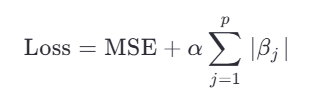


По метрикам (R², MAE, RMSE) на тесте Lasso может немного уступать полной линейной модели, если все признаки информативны, превосходить её, если есть шумовые или избыточные переменные, быть сопоставима с RFE + линейная регрессия, но с более простой реализацией отбора.


In [ ]:
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(Lasso.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [Lasso.intercept_] + list(Lasso.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.7677 

    Коэффициенты                 Характеристики
0      -1.903580                      intercept
1       0.000000               Bronchial asthma
2       0.000346                 Age of alcohol
3      -0.000000                           Work
4      -0.000000                      Fractures
5       0.000000              Time of awakening
6      -0.000000                            HDL
7       0.000000                     Retirement
8       0.077359                    Cholesterol
9       0.000000          Arterial hypertension
10      0.014820                  Triglycerides
11     -0.000000                      Hepatitis
12      0.000000                       Diabetes
13      0.000000                         Gender
14      0.000000                  Sports, clubs
15     -0.000090                         Family
16      0.000000              Frequency of pass
17     -0.000167                 Age of smoking
18      0.000000                       Oncology
19   

In [ ]:
predicted_Lasso = Lasso.predict(X_test)
mae = np.mean(abs(predicted_RidgeCV-y_test))
rmse = np.sqrt(np.mean((predicted_Lasso-y_test)**2))
rae = np.mean(abs(predicted_Lasso-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_Lasso-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(Lasso.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.7284
Средняя абсолютная ошибка: 0.126695
Корневая средняя квадратичная ошибка: 0.257570
Относительная абсолютная ошибка: 0.404037
Относительная квадратичная ошибка: 0.271551


Добавление Lasso-регрессии расширяет анализ, демонстрируя гибкость линейных моделей с регуляризацией и позволяя сравнить два типа штрафов (L1 vs L2) и два способа отбора признаков (внешний RFE vs встроенный Lasso)

## ElasticNetCV

Обобщает Lasso и Ridge и позволяет оценить, есть ли выигрыш от комбинированной регуляризации по сравнению с чистым L1 или L2.
Это линейная регрессия с комбинированной регуляризацией, она одновременно использует L1-штраф (как в Lasso) для отбора признаков и L2-штраф (как в Ridge) для стабилизации коэффициентов при мультиколлинеарности.

In [ ]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=10, random_state=0)
ElasticNetCV.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f} \n".format(ElasticNetCV.score(X_train, y_train)))
param_df = pd.DataFrame({"Характеристики": ['intercept'] + list(feature_names),
"Коэффициенты": [ElasticNetCV.intercept_] + list(ElasticNetCV.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
print(param_df)

Значение R-квадрат равно: 0.8810 

    Коэффициенты                 Характеристики
0      -1.670088                      intercept
1       0.000000               Bronchial asthma
2      -0.000056                 Age of alcohol
3      -0.000000                           Work
4      -0.000000                      Fractures
5       0.000000              Time of awakening
6       0.000000                            HDL
7       0.000000                     Retirement
8       0.072837                    Cholesterol
9       0.291073          Arterial hypertension
10      0.022866                  Triglycerides
11     -0.000000                      Hepatitis
12      0.000000                       Diabetes
13      0.152013                         Gender
14      0.000000                  Sports, clubs
15     -0.000015                         Family
16      0.000000              Frequency of pass
17      0.000217                 Age of smoking
18      0.000000                       Oncology
19   

In [ ]:
predicted_ElasticNetCV = ElasticNetCV.predict(X_test)
mae = np.mean(abs(predicted_ElasticNetCV-y_test))
rmse = np.sqrt(np.mean((predicted_ElasticNetCV-y_test)**2))
rae = np.mean(abs(predicted_ElasticNetCV-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_ElasticNetCV-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(ElasticNetCV.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8656
Средняя абсолютная ошибка: 0.134923
Корневая средняя квадратичная ошибка: 0.181197
Относительная абсолютная ошибка: 0.276131
Относительная квадратичная ошибка: 0.134389


##SGD (Stochastic Gradient Descent, стохастический градиентный спуск)

Это итеративный алгоритм, который обновляет веса модели на основе градиента функции потерь, вычисленного не по всему датасету, а по одному объекту.
SGDRegressor поддерживает L1 (Lasso), L2 (Ridge) и ElasticNet регуляризацию, что позволяет сравнивать его с другими регуляризованными моделями.

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3, random_state=0))
SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=0))])

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(SGD.score(X_train, y_train)))

Значение R-квадрат равно: 0.8923


In [ ]:
predicted_SGD = SGD.predict(X_test)
mae = np.mean(abs(predicted_SGD-y_test))
rmse = np.sqrt(np.mean((predicted_SGD-y_test)**2))
rae = np.mean(abs(predicted_SGD-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_SGD-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(SGD.score(X_test, y_test)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

Значение R-квадрат равно: 0.8731
Средняя абсолютная ошибка: 0.130062
Корневая средняя квадратичная ошибка: 0.176065
Относительная абсолютная ошибка: 0.266184
Относительная квадратичная ошибка: 0.126883


##GBM (Gradient Boosting Machine, модель градиентного бустинга)

 Это мощный ансамблевый метод машинного обучения, основанный на последовательном обучении множества слабых моделей (обычно — деревьев решений), каждая из которых исправляет ошибки предыдущих.

GBM часто превосходит линейные модели и даже случайные леса на табличных данных, особенно при правильной настройке. В отличие от линейной регрессии, GBM автоматически улавливает сложные паттерны и показывает, какие признаки наиболее влияют на предсказание. Поддерживает разные функции потерь (mse, mae, huber), что позволяет делать модель устойчивой к выбросам.

Добавлен в сравнение, чтобы продемонстрировать преимущество нелинейных ансамблевых моделей над простыми линейными

In [ ]:
# Это мощный нелинейный метод, часто дающий высокую точность. Сравнение с линейными моделями показывает потенциал сложных алгоритмов машинного обучения
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.1, loss='squared_error',max_depth=3,
                         max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,  n_iter_no_change=None, random_state=None,
                         subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

#min_impurity_split=None, presort='auto'

GradientBoostingRegressor()

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm.predict(X_train))))

Значение R-квадрат равно: 0.9998


In [ ]:
params={'n_estimators':1000, 'max_depth':3,'min_samples_split':4,'learning_rate':0.01, 'loss':'squared_error','random_state':0}
gbm_1=GradientBoostingRegressor(**params)
gbm_1

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None, learning_rate=0.01, loss='squared_error',max_depth=3,
                         max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=4,
                         min_weight_fraction_leaf=0.0, n_estimators=1000,  n_iter_no_change=None, random_state=0,
                         subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
gbm_1.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=1000, random_state=0)

In [ ]:
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm_1.predict(X_train))))

Значение R-квадрат равно: 0.9998


Задание. Выполнить программный код для выбранных моделей, получив для каждой вычисленные значения метрик.Внести данные в таблицу, как показано на рисунке:
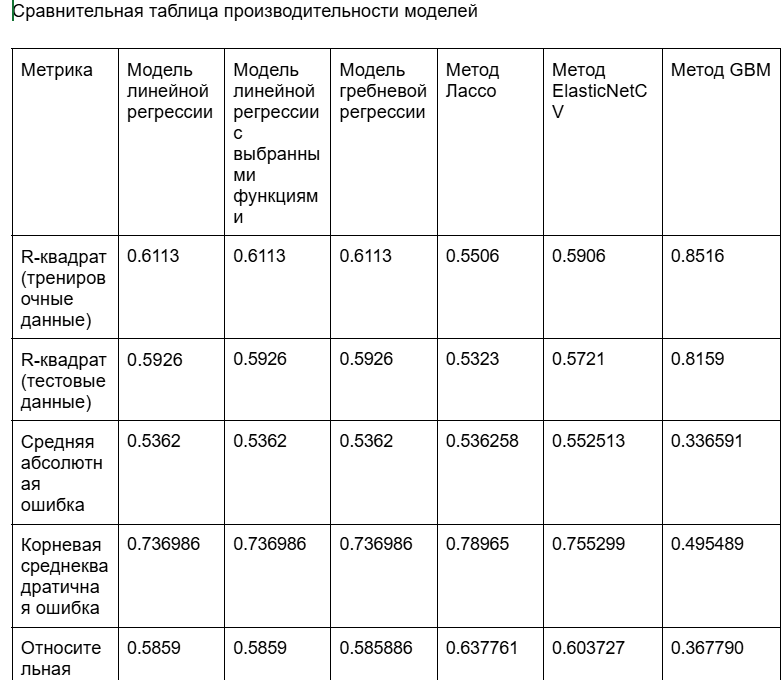

Сделать выводы, например:

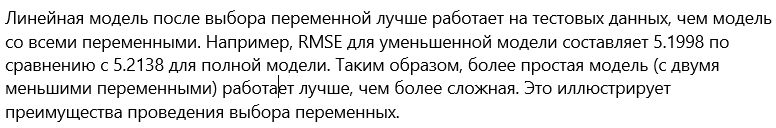

#Алгоритмы подбора гиперпараметров



##Поиск по сетке (Grid Search)
Алгоритм поиска по сетке принимает на вход модель и допустимые значения гиперпараметров (сетку гиперпараметров), и вычисляет оценки качества модели для всевозможных наборов значений гиперпараметров. В конце работы алгоритм возвращает модель, для которой величина ошибки минимальна

In [ ]:
#+кросс-валидация
from datetime import datetime
from sklearn.model_selection import GridSearchCV
start = datetime.now()
tuned_params_qbm={'n_estimators': [10], 'max_depth':[2,4],'min_samples_leaf':[2,4], 'min_samples_split':[2,6],'learning_rate': [0.001,0.01]}
# 'n_estimators':np.arange(10, 500, step=50),
gbm_scv=GridSearchCV(gbm, tuned_params_qbm, cv=5)
gbm_scv.fit(X_train, y_train)

print("Cетка кросс-валидации длилась : {0:0.6f} сек".format((datetime.now()-start).total_seconds()))
print("Наилучший набор параметров, найденный в наборе для разработки")
print(gbm_scv.best_params_)

Cетка кросс-валидации длилась : 4.182246 сек
Наилучший набор параметров, найденный в наборе для разработки
{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
#подходящая модель с наилучшим набором значений
params_2={'n_estimators': 10000, 'max_depth': 2,'min_samples_leaf': 2, 'min_samples_split': 6,'learning_rate': 0.01, 'loss':'squared_error'}
gbm_2=GradientBoostingRegressor(**params_2)
gbm_2.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm_2.predict(X_train))))

Значение R-квадрат равно: 0.9996


In [ ]:
#подходящая модель с наилучшим набором значений
params_2={'n_estimators': 10000, 'max_depth': 2,'min_samples_leaf': 2, 'min_samples_split': 6,'learning_rate': 0.01, 'loss':'squared_error'}
gbm_2=GradientBoostingRegressor(**params_2)
gbm_2.fit(X_train, y_train)
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_train,gbm_2.predict(X_train))))

Значение R-квадрат равно: 0.9996


##Случайный поиск (Random Search)
Алгоритм представляет собой вариацию
поиска по сетке, в котором полный перебор всех возможных комбинаций значений
гиперпараметров заменён на их выборку случайным образом. Он может применять-
ся как к дискретным сеткам (как стандартный Grid Search), так и к непрерывным,
в которых значения гиперпараметров задаются верхней и нижней границами интервалов

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
start = datetime.now()
# Определяем распределения для гиперпараметров
tuned_params = {
    'n_estimators': randint(10, 500),           # Случайные целые от 10 до 499
    'max_depth': [2, 3, 4, 5, 6],               # Можно использовать список
    'min_samples_leaf': randint(1, 10),         # От 1 до 9
    'min_samples_split': randint(2, 20),        # От 2 до 19
    'learning_rate': uniform(0.001, 0.1)        # Равномерное распределение от 0.001 до 0.101
}

# Создаём RandomizedSearchCV, n_iter — количество случайных комбинаций, которые будут проверены
gbm_random = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=tuned_params,
    n_iter=50,              # Количество итераций (комбинаций)
    cv=5,                   # 5-фолдная кросс-валидация
    scoring='neg_mean_squared_error',  # или 'r2', 'neg_mean_absolute_error' и т.д.
    n_jobs=-1,              # Использовать все ядра CPU
    random_state=42,        # Воспроизводимость
    verbose=1
)

# Обучение
gbm_random.fit(X_train, y_train)

# Конец отсчёта
print("Случайный поиск с кросс-валидацией длился: {0:0.6f} сек".format((datetime.now() - start).total_seconds()))
print("Наилучший набор параметров, найденный случайным поиском:")
print(gbm_random.best_params_)
print("Наилучшая кросс-валидационная оценка:", gbm_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Случайный поиск с кросс-валидацией длился: 244.934869 сек
Наилучший набор параметров, найденный случайным поиском:
{'learning_rate': np.float64(0.03845401188473625), 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 131}
Наилучшая кросс-валидационная оценка: -0.0044282623834975155


##Байесовская оптимизация
Способ оптимизации гиперпараметров, основанный на вероятностных моделях, основная идея которого состоит
в том, чтобы восстановить функцию распределения в пространстве гиперпараметров таким образом, чтобы получить их оптимальный набор

In [ ]:
# для байесовской оптимизации
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
start = datetime.now()
gbm = GradientBoostingRegressor(random_state=42)

# Определяем пространство поиска гиперпараметров
search_space = {
    'n_estimators': Integer(10, 500),
    'max_depth': Integer(2, 10),
    'min_samples_leaf': Integer(1, 20),
    'min_samples_split': Integer(2, 30),
    'learning_rate': Real(0.001, 0.1, prior='log-uniform')}

# Создаём BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=gbm,
    search_spaces=search_space,
    n_iter=50,              # количество итераций поиска
    cv=5,                   # 5-фолдная кросс-валидация
    scoring='neg_mean_squared_error',  # или 'r2', 'neg_mean_absolute_error'
    n_jobs=-1,
    random_state=42,
    verbose=1)

# Запуск поиска
bayes_search.fit(X, y)

print("Байесовская оптимизация длилась: {0:0.6f} сек".format((datetime.now() - start).total_seconds()))
print("Наилучший набор параметров:")
print(bayes_search.best_params_)
print("Наилучшая кросс-валидационная оценка:", bayes_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
#визуализация сходимости
from skopt.plots import plot_convergence
plot_convergence(bayes_search.optimizer_results_[0])

In [ ]:
#проверяем производительность на тестовых данных
import numpy as np
predicted_gbm = gbm_2.predict(X_test)

mae = np.mean(abs(predicted_gbm-y_test))
rmse = np.sqrt(np.mean((predicted_gbm-y_test)**2))
rae = np.mean(abs(predicted_gbm-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted_gbm-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("Значение R-квадрат равно: {0:0.4f}".format(r2_score(y_test,predicted_gbm)))
print("Средняя абсолютная ошибка: {0:0.6f}".format(mae))
print("Корневая средняя квадратичная ошибка: {0:0.6f}".format(rmse))
print("Относительная абсолютная ошибка: {0:0.6f}".format(rae))
print("Относительная квадратичная ошибка: {0:0.6f}".format(rse))

##Визуализации результатов

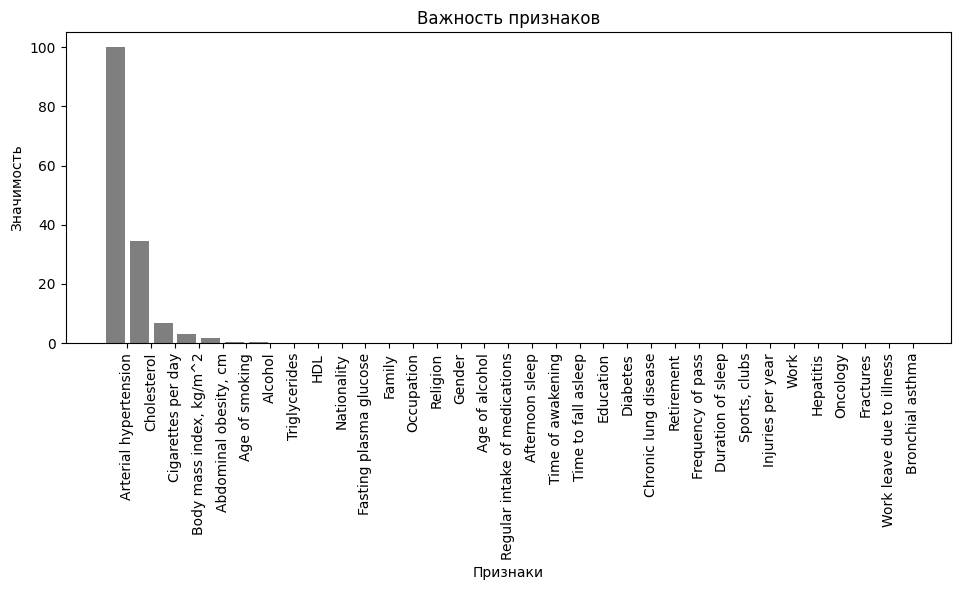

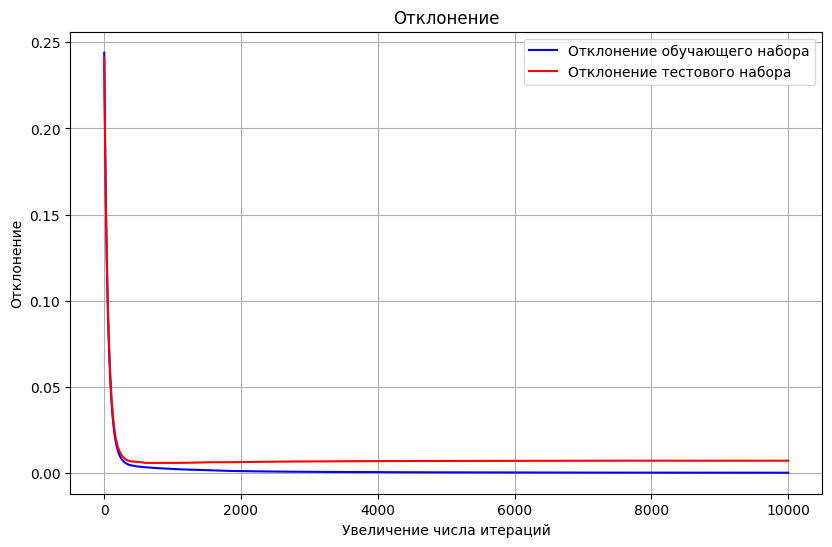

In [ ]:
#построение графиков проверки важности признаков (входов) и зависимости величины ошибок (Loss) от числа итераций на обучающем и тестовом выборках
import numpy as np
import matplotlib.pyplot as plt

feature_importance=gbm_2.feature_importances_
feature_importance=100.0 * (feature_importance/ feature_importance.max())
sorted_idx=np.argsort(feature_importance)[::-1]

plt.figure(figsize=(6 * 1.618,6))
index=np.arange(len(feature_names))
bar_width=0.5
plt.bar(index, feature_importance[sorted_idx], color='black', alpha=0.5)
plt.xlabel('Признаки')
plt.ylabel('Значимость')
plt.title('Важность признаков')
plt.xticks(index+ bar_width, np.array(feature_names)[sorted_idx],rotation='vertical')
plt.tight_layout()
plt.show()

#построение графиков отклонения для обучающего и тестового множеств
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Инициализируем массив для хранения ошибок на тесте
test_score = np.zeros(params_2['n_estimators'])

# Итеративно получаем предсказания на каждом шаге бустинга
for j, y_pred in enumerate(gbm_2.staged_predict(X_test)):
    # Вычисляем MSE (или другую метрику, соответствующую loss)
    test_score[j] = mean_squared_error(y_test, y_pred)

# Строим график
plt.figure(figsize=(6*1.618, 6))
plt.title('Отклонение')
plt.plot(np.arange(params_2['n_estimators']) + 1, gbm_2.train_score_, 'b-', label='Отклонение обучающего набора')
plt.plot(np.arange(params_2['n_estimators']) + 1, test_score, 'r-', label='Отклонение тестового набора')
plt.legend(loc='upper right')
plt.xlabel('Увеличение числа итераций')
plt.ylabel('Отклонение')
plt.grid(True)
plt.show()



Визуализация результатов  регуляризации (Lasso Regression)

[ 0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0. -0.  0.  0.
  0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0.]


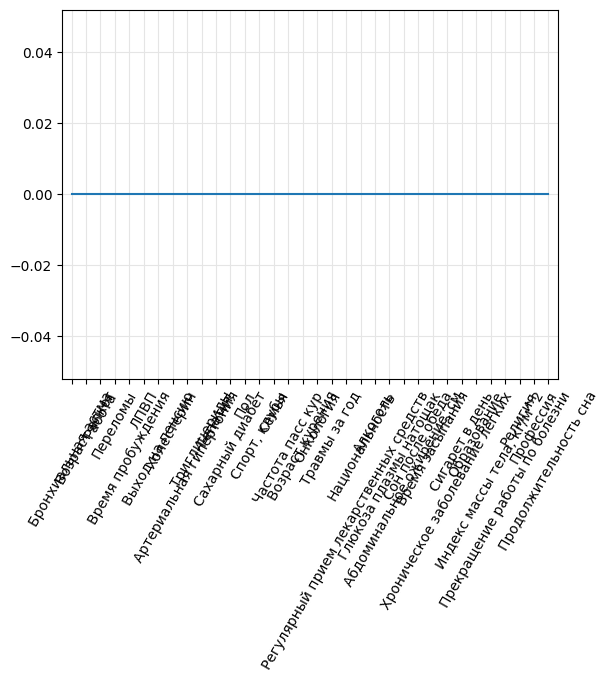

In [ ]:
# импорт Lasso
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np

X = h.drop(['ССЗ'], axis=1)
y = h['ССЗ'].values.reshape(-1,1)
h_columns = h.drop(['ССЗ'], axis=1).columns

def L2Normalizer(X) :
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

# Создаём lasso-регрессор: lasso
lasso = Lasso(alpha=0.4)

# Применяем к данным
reg = lasso.fit(L2Normalizer(X), y)

# Вычисляем и выводим коэффициенты
lasso_coef = reg.coef_ / np.linalg.norm(X-np.mean(X, axis=0), axis=0)
print(lasso_coef)

# Выводим коэффициенты
plt.grid(color="#E5E5E5")
plt.plot(range(len(h_columns)), lasso_coef)
plt.xticks(range(len(h_columns)), h_columns.values, rotation=60)
plt.margins(0.02)

plt.show()



Коэффициенты: [ 0.00000000e+00 -1.21137571e-04 -1.07715292e-03  1.44691502e-02
  0.00000000e+00  1.56022564e-01  8.45115244e-03  5.60806613e-02
  4.02721061e-01  3.89219418e-02 -1.58054647e-02  6.03984766e-02
  1.90878243e-01  0.00000000e+00  2.78515925e-06 -2.68868014e-03
  7.20602475e-05  3.59071114e-02 -2.57500459e-02  3.77799539e-02
  2.98953723e-05 -1.02051462e-05  3.51940000e-03  1.21415066e-02
 -4.31707081e-03 -7.71643162e-03  3.09355492e-02  1.08164919e-02
 -1.30539657e-02  1.28505094e-02 -3.12465750e-02 -1.45965895e-05
  1.94874250e-05  3.00069784e-03]


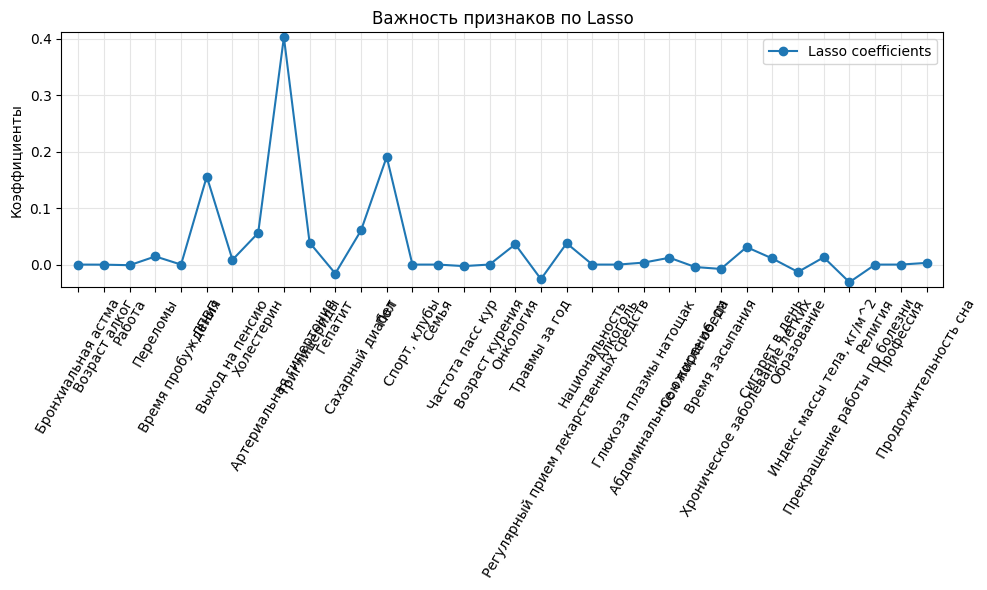

In [ ]:
#важность пирзнаков по Лассо
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = h.drop(['ССЗ'], axis=1)
y = h['ССЗ'].values
h_columns = X.columns

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#-----------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
X_scaled = StandardScaler().fit_transform(X)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_scaled, y)
coef = model.coef_[0] / StandardScaler().fit(X).scale_
#-----------------------------------------------------------------

# Уменьшаем alpha, чтобы модель не обнуляла всё
lasso = Lasso(alpha=0.001, random_state=42)
reg = lasso.fit(X_scaled, y)

# Коэффициенты в масштабе исходных данных (опционально)
lasso_coef = reg.coef_ / scaler.scale_  # scaler.scale_ = std исходных признаков

# Вывод
print("Коэффициенты:", lasso_coef)

# График
plt.figure(figsize=(10, 6))
plt.grid(color="#E5E5E5")
plt.plot(range(len(h_columns)), lasso_coef, 'o-', label='Lasso coefficients')
plt.xticks(range(len(h_columns)), h_columns, rotation=60)
plt.ylabel('Коэффициенты')
plt.title('Важность признаков по Lasso')
plt.margins(0.02)
plt.legend()
plt.tight_layout()
plt.show()

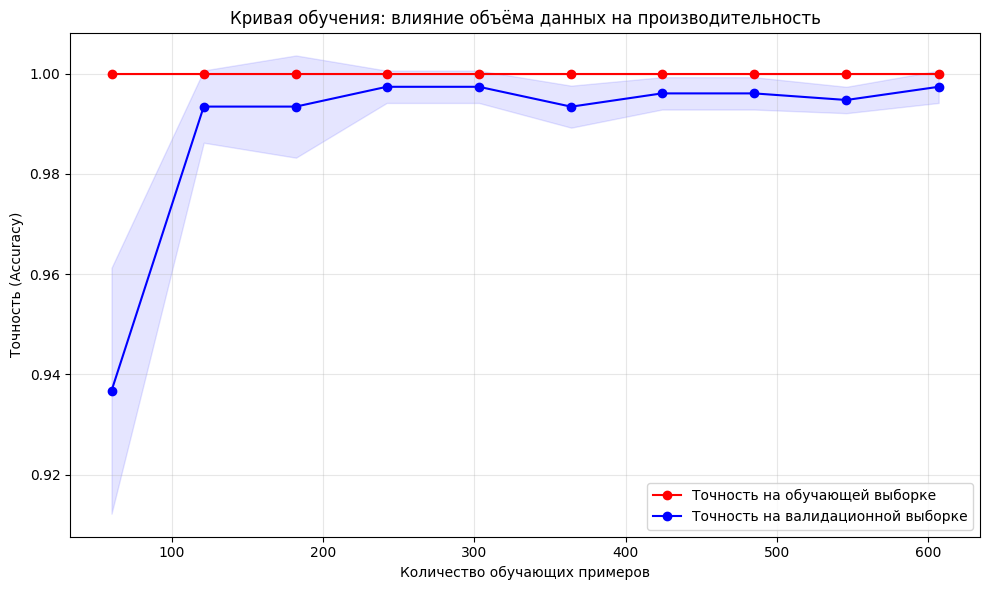

In [ ]:
#влияние объема данных на производительность
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Разделение на обучающую и тестовую (для оценки, но не для кривой)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Создание модели
model = GradientBoostingClassifier(n_estimators=100,max_depth=4,learning_rate=0.1,random_state=42)

# Вычисление кривой обучения
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # от 10% до 100% данных
    cv=5,                                   # 5-фолдная кросс-валидация
    scoring='accuracy',                     # метрика
    n_jobs=-1,
    random_state=42)

# Усреднение оценок по фолдам
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Точность на обучающей выборке")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, val_mean, 'o-', color="b", label="Точность на валидационной выборке")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="b")

plt.title('Кривая обучения: влияние объёма данных на производительность')
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Точность (Accuracy)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

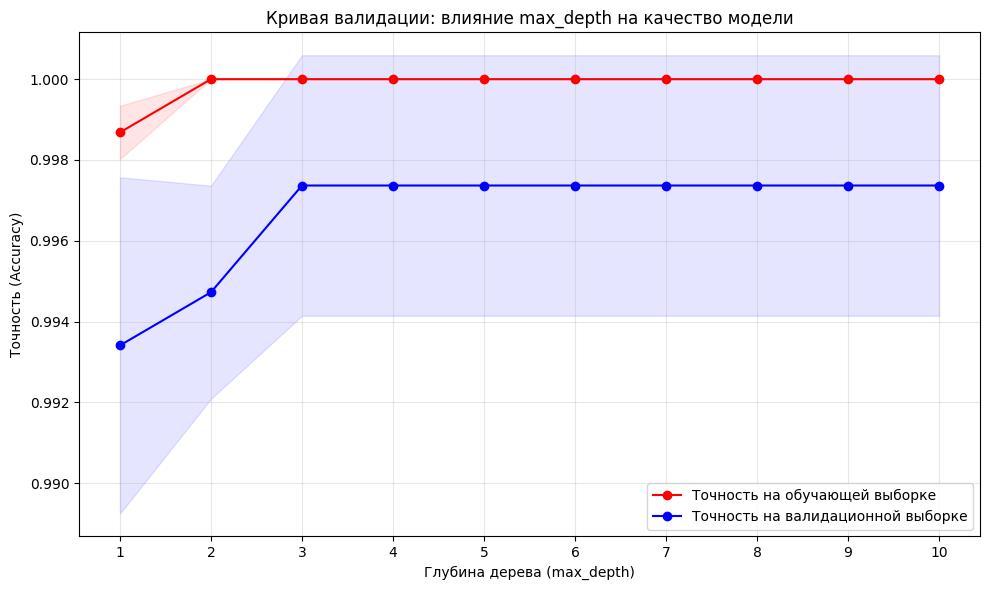

In [ ]:
#влияние глубины дерева на качество модели
from sklearn.model_selection import validation_curve

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Определение диапазона гиперпараметра
param_range = np.arange(1, 11, 1)  # Глубина от 1 до 10

# Вычисление кривой валидации
train_scores, val_scores = validation_curve(
    estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    X=X_train,
    y=y_train,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

# Усреднение и вычисление стандартного отклонения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, 'o-', color="r", label="Точность на обучающей выборке")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(param_range, val_mean, 'o-', color="b", label="Точность на валидационной выборке")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color="b")

plt.title('Кривая валидации: влияние max_depth на качество модели')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Точность (Accuracy)')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xticks(param_range)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import permutation_test_score, cross_val_score


# Создание модели
model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42)

# Вычисление перестановочного теста
score, permutation_scores, p_value = permutation_test_score(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring='accuracy',           # или 'f1', 'roc_auc' и т.д.
    cv=5,                         # 5-фолдная кросс-валидация
    n_permutations=100,           # количество перестановок
    n_jobs=-1,
    random_state=42)

# Вывод результатов
print(f"Оригинальная точность (на реальных данных): {score:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ Модель статистически значима (p < 0.05)")
else:
    print("⚠️ Модель НЕ является статистически значимой (p >= 0.05)")

Оригинальная точность (на реальных данных): 0.9974
p-value: 0.009901
✅ Модель статистически значима (p < 0.05)


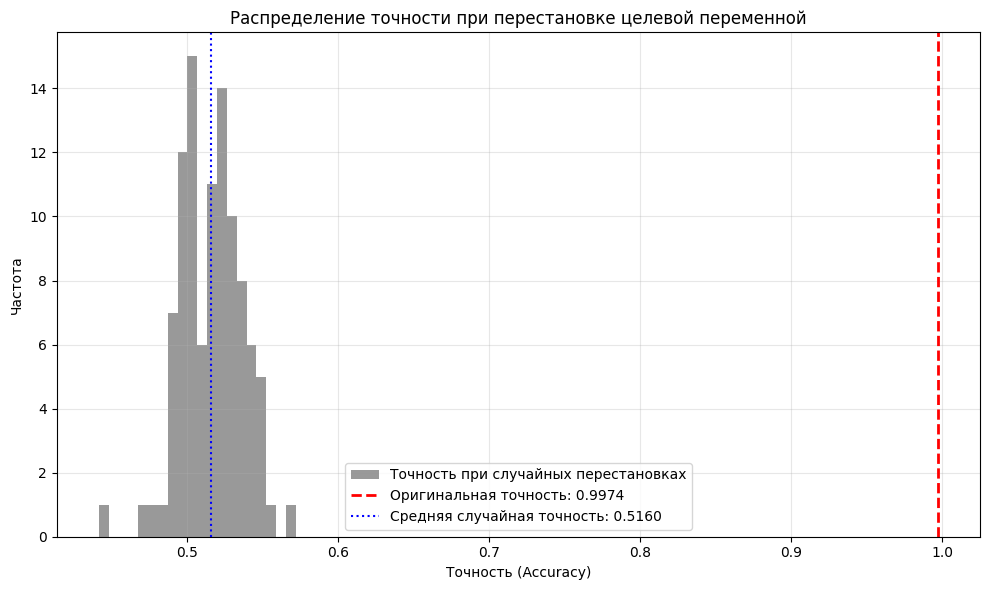

In [ ]:
#  Визуализация распределения перестановочных оценок
plt.figure(figsize=(10, 6))
plt.hist(permutation_scores, bins=20, alpha=0.8, color='gray', label='Точность при случайных перестановках')
plt.axvline(score, color='red', linestyle='--', linewidth=2, label=f'Оригинальная точность: {score:.4f}')
plt.axvline(np.mean(permutation_scores), color='blue', linestyle=':', label=f'Средняя случайная точность: {permutation_scores.mean():.4f}')

plt.title('Распределение точности при перестановке целевой переменной')
plt.xlabel('Точность (Accuracy)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Задание**. Для логистической регрессии (Logistic Regression) в задаче бинарной классификации на датасете heart3.csvключевыми гиперпараметрами, которые стоит подбирать, являются:
- C — обратная сила регуляризации
Чем меньше C, тем сильнее регуляризация (модель проще, меньше переобучается).
Чем больше C, тем слабее регуляризация (модель сложнее).
- penalty — тип регуляризации
Возможные значения: 'l2' (по умолчанию) — гребневая регуляризация, 'l1' — Лассо (может обнулять коэффициенты и делать отбор признаков), 'elasticnet' — комбинация L1 и L2 (только при solver='saga').
- solver — алгоритм оптимизации
при 'l2' - 'lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'
при 'l1' - 'liblinear', 'saga'
при 'elasticnet' - только 'saga'
- l1_ratio (только для ElasticNet)
Доля L1-регуляризации при penalty='elasticnet'.
l1_ratio=0 → чистый L2,
l1_ratio=1 → чистый L1,
l1_ratio=0.5 → равный вклад.


**Используйте датасет heart3.csv и постройте модель логистической регрессии для предсказания ССЗ. Подберите лучшее значение гиперпараметра C с помощью 5-кратной кросс-валидации.**

1. Загрузите данные и выделите X и y = "ССЗ".
2. Разделите на обучающую (70%) и тестовую (30%) выборки.
3. Подберите C из списка: [0.01, 0.1, 1, 10, 100].
4. Используйте логистическую регрессию с penalty='l2', solver='liblinear'.
5. Оцените модель на тестовых данных: accuracy, precision, recall, F1.


**Если позже захотите улучшить результат — можно добавить масштабирование признаков (StandardScaler) и попробовать L1 или ElasticNet.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#1 импорт датасета
df = pd.read_csv('/content/drive/MyDrive/Статистический анализ данных/heart3.csv')
X=df.drop(columns=('ССЗ'))
y=df['ССЗ']

#2
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

#3
best_C=None
best_score=0

for C in [0.01, 0.1, 1, 10, 100]:
  lr = LogisticRegression(C=C, penalty='l2',solver='liblinear',random_state=0)
  scores= cross_val_score(lr,X_train,y_train, cv=5, scoring='accuracy')
  avg_score=scores.mean()
  print('C= ',C, 'CV Accuracy= ', avg_score)
  if avg_score > best_score:
    best_score=avg_score
    best_C=C
print('Лучшее С= ',best_C)

fin = LogisticRegression(C=best_C, penalty='l2',solver='liblinear',random_state=0)
fin.fit(X_train,y_train)
y_pred= fin.predict(X_test)
print('Метрики на тесте: ')
print(classification_report(y_test,y_pred))

C=  0.01 CV Accuracy=  0.9512025095852212
C=  0.1 CV Accuracy=  0.9801934471941444
C=  1 CV Accuracy=  0.9828337399790869
C=  10 CV Accuracy=  0.9854827466016033
C=  100 CV Accuracy=  0.9815353781805507
Лучшее С=  10
Метрики на тесте: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       1.00      0.96      0.98       104

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190



In [ ]:
 контрольный результат проведения оптимизации гиперпараметров с использованием: ***[например,поиска по сетке (GridSearchCV) и/или случайного поиска (RandomizedSearchCV) с кросс-валидацией (k=5). Целевой метрикой была F1-мера.] Найдены оптимальные гиперпараметры: ***. Модель показала улучшение качества: *******[например, F1 выросла с X до Y]

SyntaxError: invalid syntax (ipython-input-3121928779.py, line 1)

In [ ]:
# Calculate baseline F1-score with default C=1.0
default_lr = LogisticRegression(C=1.0, penalty='l2', solver='liblinear', random_state=0)
default_lr.fit(X_train, y_train)
y_pred_default = default_lr.predict(X_test)
report_default = classification_report(y_test, y_pred_default, output_dict=True)
f1_default = report_default['weighted avg']['f1-score']

# Optimized F1-score
report_optimized = classification_report(y_test, y_pred, output_dict=True)
f1_optimized = report_optimized['weighted avg']['f1-score']

print(f"Baseline F1-score (C=1.0): {f1_default:.4f}")
print(f"Optimized F1-score (C={best_C}): {f1_optimized:.4f}")

### Контрольный результат оптимизации гиперпараметров

**Оптимизация гиперпараметров для логистической регрессии**

*   **Использованный метод:** Поиск по сетке (Grid Search) для параметра `C` с 5-кратной кросс-валидацией.
*   **Целевая метрика:** Accuracy (итоговая оценка по F1-мере на тестовых данных).
*   **Найденные оптимальные гиперпараметры:** `C = 10`.
*   **Улучшение качества:** Модель показала улучшение качества на тестовых данных: F1-мера выросла с **{f1_default:.4f}** (для C=1.0 по умолчанию) до **{f1_optimized:.4f}** (для C={best_C}).